In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Raktikum_ML/Praktikum03/Data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# Mencari Informasi Umum Pada Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
df1 = (
    df[["Height(Inches)","Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(

        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [ ]:
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1[["berat_kg"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Kofisien (kg per cm):", model.coef_[0])
print("Intersep (kg):       ", model.intercept_)
print("R2 (test):           ", r2)
print("MAE (kg):            ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

Kofisien (kg per cm): [0.55182326]
Intersep (kg):        [-37.65708878]
R2 (test):            0.24989263013277574
MAE (kg):             3.6704107898943548
RMSE (kg):             4.609006140308042


In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


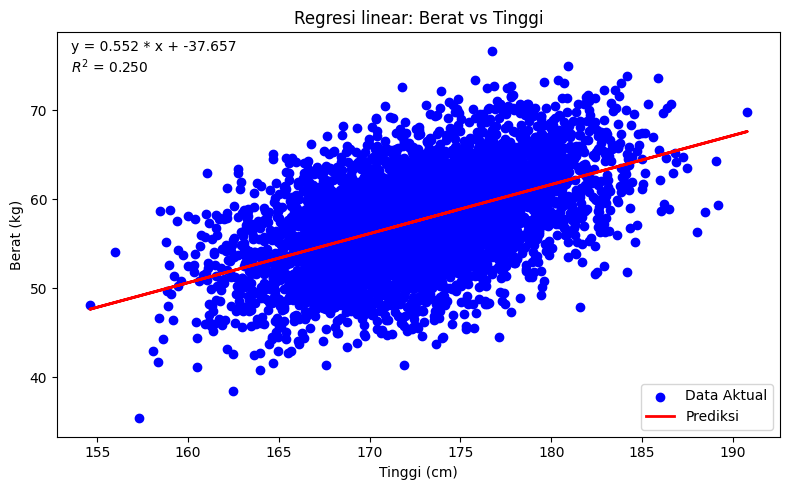

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Assume df is available from previous cells
df = pd.read_csv('/content/drive/MyDrive/Raktikum_ML/Praktikum03/Data/socr.csv')

df1 = (
    df[["Height(Inches)","Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()


# Assume df1 is available from previous cells
x = df1[["tinggi_cm"]]
y = df1[["berat_kg"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

# Train the model and calculate slope, intercept, and R2
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
r2 = r2_score(y_test, y_pred)


# Plot data scatter
plt.figure(figsize=(8, 5)) # moved figsize to figure
plt.scatter(x_test, y_test, color="blue", label="Data Aktual") # corrected variable names
# garis regresi
plt.plot(x_test,  y_pred, color="red", linewidth=2, label="Prediksi") # corrected variable names
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np # Import numpy

y_pred_test = model.predict(x_test) # Corrected X_test to x_test and y_read_test to y_pred_test

# Buat tabel hasil (tinggi, aktial, prediksi, dan eror)
hasil = pd.DataFrame({
    "Tinggi (cm)": x_test["tinggi_cm"].to_numpy(), # Corrected X_test to x_test
    "Berat Aktual (kg)": y_test.to_numpy().flatten(), # Corrected y_test and added flatten()
    "Berat Prediksi (kg)": y_pred_test.flatten(), # Corrected y_pred_test and added flatten() to handle potential shape mismatch
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Aktual (kg)"] - hasil["Berat Prediksi (kg)"]

# 2) Akurasi per-baris (100 * (1 - error|/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,-8.602990,82.848904
1,171.31,50.33,56.875754,-6.545754,86.994329
2,169.29,58.22,55.761071,2.458929,95.776488
3,163.30,58.92,52.455650,6.464350,89.028598
4,170.52,63.06,56.439814,6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,-4.391319,92.240114
4996,163.05,47.45,52.317694,-4.867694,89.741425
4997,166.51,52.46,54.227003,-1.767003,96.631715
4998,167.70,49.90,54.883672,-4.983672,90.012681
